<a href="https://colab.research.google.com/github/KARTIKPARATKAR/LLM-GEN-AI/blob/main/Tokenization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tokenization -**  Tokenization comes under the Data preprocessing and sampling.It is a process of breaking the sentence into individual words and assign it with the unique value.We have to prepare the data available to fed it to the LLM model.The process of tokenization can be categorized into 3 steps.

a) Splitting text into individual word and subwords.

b) Convert tokens into token ids.

c) Encode token ids into vector representations.

**How input is provided to LLM for training-**


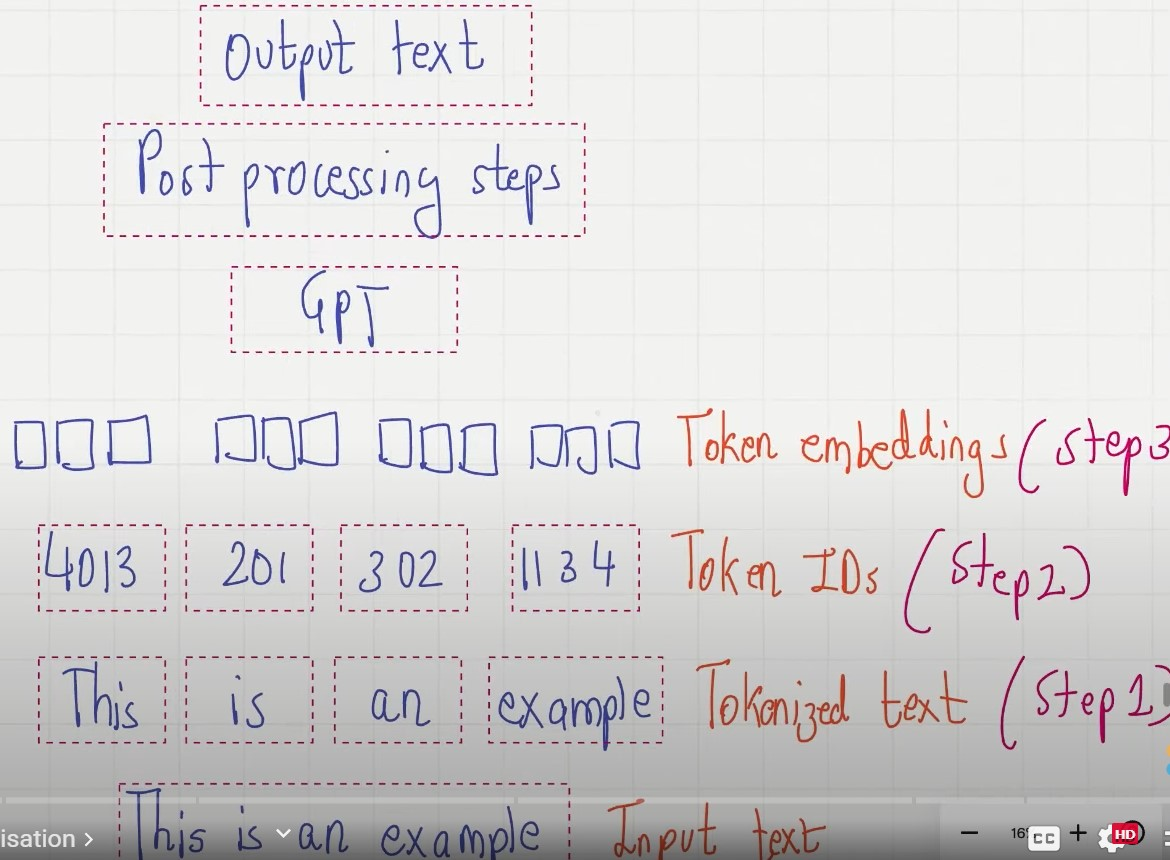


Dataset - We will use Edith Wharton book The Verdict for training the LLM model. Link of the dataset is - https://github.com/rasbt/LLMs-from-scratch/blob/main/ch02/01_main-chapter-code/the-verdict.txt

In this notebook , we will basically create a two tokenizer classes called SimpleTokenizerV1 and SimpleTokenizerV2 . This V1 class is for normal tokenizer class which converts the text into tokens and assign them with the token id without handaling the not availability of text in the training dataset.

This V2 class is with the consideration of if in case the text token is not present in the dataset , then assisn that token with unknown token and specific id which will not give the error while tokenization.

**Creating tokens**

In [41]:

with open("/content/the-verdict.txt","r",encoding="utf-8") as f:  #r meaning we are reding this file.
  raw_text = f.read()

print("Totalnumber of character:",len(raw_text))  #Printing out the total number of characters.
print(raw_text[:99])

Totalnumber of character: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


In [42]:
#We have to tokenize all the available 20479 words.Here our dataset is of very less words,we might have millions of words for the training LLM model.


In [43]:
import re

text = "Hello, world. This,is a test."
result = re.split(r'(\s)',text)  #This code is finding the white spaces available in sentence and splitting it in diferent words.
print(result)

['Hello,', ' ', 'world.', ' ', 'This,is', ' ', 'a', ' ', 'test.']


In [44]:
result = re.split(r'([,.]|\s)',text)  #This code will split the words along with full stop and comma.
print(result)

['Hello', ',', '', ' ', 'world', '.', '', ' ', 'This', ',', 'is', ' ', 'a', ' ', 'test', '.', '']


In [45]:
#We dont want white space characters in the result.
result = [item for item in result if item.strip()]
print(result)  #Here we will not have white spaces in the result.
#Excluding the white spaces makesless memory usage.Keeping the whitespaces can be useful
#that are sensitive to the exact structure of the text.In some dataset , white spaces can have a
#meaning like python code/idntation.

['Hello', ',', 'world', '.', 'This', ',', 'is', 'a', 'test', '.']


In [46]:
#We will have some other characters like ? , / , + , - , -- , etc. We also want
#to split all these charaters in different tokens.
text = "Hello, world. Is this-- a test?"
result = re.split(r'([,.:;?_!"()\']|--|\s)',text)
result = [item.strip() for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


In [47]:
#We will apply this above code on our dataset
#Our dataset is stored in raw_text

preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)',raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
print(preprocessed)

#This code will print the enire dataset words as a unit token


['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in', 'the', 'height', 'of', 'his', 'glory', ',', 'he', 'had', 'dropped', 'his', 'painting', ',', 'married', 'a', 'rich', 'widow', ',', 'and', 'established', 'himself', 'in', 'a', 'villa', 'on', 'the', 'Riviera', '.', '(', 'Though', 'I', 'rather', 'thought', 'it', 'would', 'have', 'been', 'Rome', 'or', 'Florence', '.', ')', '"', 'The', 'height', 'of', 'his', 'glory', '"', '--', 'that', 'was', 'what', 'the', 'women', 'called', 'it', '.', 'I', 'can', 'hear', 'Mrs', '.', 'Gideon', 'Thwing', '--', 'his', 'last', 'Chicago', 'sitter', '--', 'deploring', 'his', 'unaccountable', 'abdication', '.', '"', 'Of', 'course', 'it', "'", 's', 'going', 'to', 'send', 'the', 'value', 'of', 'my', 'picture', "'", 'way', 'up', ';', 'but', 'I', 'don', "'", 't', 'think', 'of', 'that', ',

**Assigning the tokens a token id**

If dataset is "I am a boy , I live in India." So will assign I as 0 , am as 1 , a as 2 , boy as 3 , live as 4 , in as 5 and so on.

Each unique token is mapped to an unique integer called tokens ID.

In [48]:
all_words = sorted(set(preprocessed)) #This will convert the tokens into set and then sort it in alphabetical order
print(all_words)  #This will print the sorted set of tokens
print(len(all_words))  #This will print the length of the sorted set

['!', '"', "'", '(', ')', ',', '--', '.', ':', ';', '?', 'A', 'Ah', 'Among', 'And', 'Are', 'Arrt', 'As', 'At', 'Be', 'Begin', 'Burlington', 'But', 'By', 'Carlo', 'Chicago', 'Claude', 'Come', 'Croft', 'Destroyed', 'Devonshire', 'Don', 'Dubarry', 'Emperors', 'Florence', 'For', 'Gallery', 'Gideon', 'Gisburn', 'Gisburns', 'Grafton', 'Greek', 'Grindle', 'Grindles', 'HAD', 'Had', 'Hang', 'Has', 'He', 'Her', 'Hermia', 'His', 'How', 'I', 'If', 'In', 'It', 'Jack', 'Jove', 'Just', 'Lord', 'Made', 'Miss', 'Money', 'Monte', 'Moon-dancers', 'Mr', 'Mrs', 'My', 'Never', 'No', 'Now', 'Nutley', 'Of', 'Oh', 'On', 'Once', 'Only', 'Or', 'Perhaps', 'Poor', 'Professional', 'Renaissance', 'Rickham', 'Riviera', 'Rome', 'Russian', 'Sevres', 'She', 'Stroud', 'Strouds', 'Suddenly', 'That', 'The', 'Then', 'There', 'They', 'This', 'Those', 'Though', 'Thwing', 'Thwings', 'To', 'Usually', 'Venetian', 'Victor', 'Was', 'We', 'Well', 'What', 'When', 'Why', 'Yes', 'You', '_', 'a', 'abdication', 'able', 'about', 'above',

In [49]:
#Now we will create a vocabolary which means the unique words along with
#the token id in form of dictionary.

vocab = {token:integer for integer,token in enumerate(all_words)}

In [50]:
for i , item in enumerate(vocab.items()):
  print(item)
  if i>=50:
    break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('Grindles', 43)
('HAD', 44)
('Had', 45)
('Hang', 46)
('Has', 47)
('He', 48)
('Her', 49)
('Hermia', 50)


In [51]:
print(vocab)

{'!': 0, '"': 1, "'": 2, '(': 3, ')': 4, ',': 5, '--': 6, '.': 7, ':': 8, ';': 9, '?': 10, 'A': 11, 'Ah': 12, 'Among': 13, 'And': 14, 'Are': 15, 'Arrt': 16, 'As': 17, 'At': 18, 'Be': 19, 'Begin': 20, 'Burlington': 21, 'But': 22, 'By': 23, 'Carlo': 24, 'Chicago': 25, 'Claude': 26, 'Come': 27, 'Croft': 28, 'Destroyed': 29, 'Devonshire': 30, 'Don': 31, 'Dubarry': 32, 'Emperors': 33, 'Florence': 34, 'For': 35, 'Gallery': 36, 'Gideon': 37, 'Gisburn': 38, 'Gisburns': 39, 'Grafton': 40, 'Greek': 41, 'Grindle': 42, 'Grindles': 43, 'HAD': 44, 'Had': 45, 'Hang': 46, 'Has': 47, 'He': 48, 'Her': 49, 'Hermia': 50, 'His': 51, 'How': 52, 'I': 53, 'If': 54, 'In': 55, 'It': 56, 'Jack': 57, 'Jove': 58, 'Just': 59, 'Lord': 60, 'Made': 61, 'Miss': 62, 'Money': 63, 'Monte': 64, 'Moon-dancers': 65, 'Mr': 66, 'Mrs': 67, 'My': 68, 'Never': 69, 'No': 70, 'Now': 71, 'Nutley': 72, 'Of': 73, 'Oh': 74, 'On': 75, 'Once': 76, 'Only': 77, 'Or': 78, 'Perhaps': 79, 'Poor': 80, 'Professional': 81, 'Renaissance': 82, 'Ri

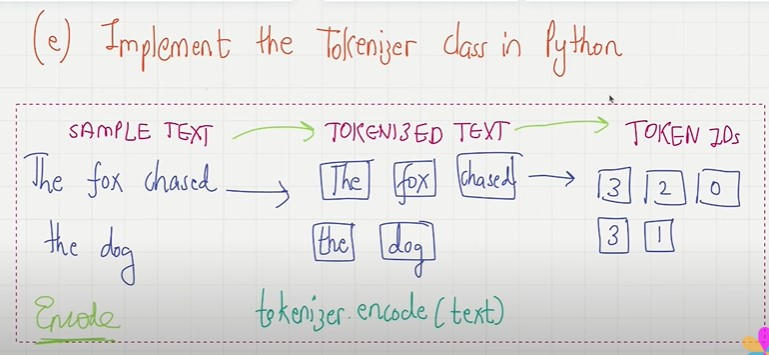

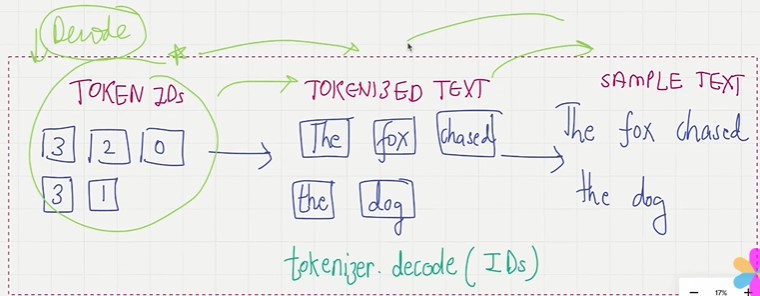

So while implementing the tokenizer class , we will require the both encoder and decoder class. Encoder class wil take sample text as input and gives token ids as output. And decoder class will take token ids will take as input and convert it into sample text.

In [52]:
class SimpleTokenizerV1:
  def __init__(self,vocab):  #This init method is called default when SimpleTokenizerV1 class is called.
    self.str_to_int = vocab
    self.int_to_str = {i:s for s,i in vocab.items()}

  def encode(self,text):
    preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)',text) #Splitting the text based on (,.:;? ....)
    preprocessed = [item.strip() for item in preprocessed if item.strip()]  #Here we are getting rid off from white spaces
    ids = [self.str_to_int.get(s, self.str_to_int['<UNK>']) for s in preprocessed]
 #Converting tokens into token ids
    return ids

  def decode(self,ids):
    text = " ".join([self.int_to_str[i] for i in ids])
    #If there is punctuations like([,.:;?_!"()\']|--|) then we dont need the space before that punctuation.
    text = re.sub(r'\s+([,.?!"()\'])',r'\1',text)
    return text




In [53]:
#This code automatically build the vocabolary from list of sentences

def build_vocab(sentences):
    tokens = set()
    for sentence in sentences:
        sentence = sentence.lower()
        split_tokens = re.split(r'([,.:;?_!"()\']|--|\s)', sentence)
        clean_tokens = [t.strip() for t in split_tokens if t.strip()]
        tokens.update(clean_tokens)

    vocab = {token: idx + 1 for idx, token in enumerate(sorted(tokens))}
    vocab['<UNK>'] = 0  # Add <UNK> for unknown tokens
    return vocab


In [54]:
#This code builds vocabolary and instantiate tokenizer
sentences = [
    "It's the last he painted, you know,",
    "Mrs. Gisburn said with pardonable pride."
]

vocab = build_vocab(sentences)
tokenizer = SimpleTokenizerV1(vocab)


Instantiate the tokenizer object from the above defined class of SimpleTokenizerV1

In [56]:
text = """"It's the last he painted, you know," Mrs. Gisburn said with pardonable pride."""
text = text.lower()
ids = tokenizer.encode(text)
print("Token IDs:", ids)  #With this line we have converted the text into ids
print("Decoded:", tokenizer.decode(ids))


Token IDs: [0, 6, 1, 13, 15, 8, 5, 10, 2, 17, 7, 2, 0, 9, 3, 4, 14, 16, 11, 12, 3]
Decoded: <UNK> it' s the last he painted, you know, <UNK> mrs. gisburn said with pardonable pride.


In [57]:
tokenizer.decode(ids) #This is the code to convert ids into tokens

"<UNK> it' s the last he painted, you know, <UNK> mrs. gisburn said with pardonable pride."

Till now we have imlemented the simple tokenizer and applied it to a passage from the training set.Now we will modify this tokenizer to handle unknown words which will not be available in the training dataset.We will implement something called as special context tokens.We will update the tokenizer class to handle the unknown task.

In [70]:
#We will add the two tokens one is endoftext and unknown token.
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])

vocab = {token:integer for integer,token in enumerate(all_tokens)}

In [71]:
len(vocab.items()) #Previously length was 1130 , now length after adding two tokens is 1132

1132

In [75]:
#Printing the last 5 entries in the vocabolary
for i, item in enumerate(list(vocab.items())[-5:]):
  print(item)

#Observe last two entries,there is two extra entries added by us explicitly

('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


While assigning an integer to the token,if that token is not present in the vocabolary , then we will assign unknown token id that token.

In [76]:
class SimpleTokenizerV2:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = { i:s for s,i in vocab.items()}

    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        preprocessed = [
            item if item in self.str_to_int
            else "<|unk|>" for item in preprocessed
        ]

        ids = [self.str_to_int[s] for s in preprocessed]
        return ids

    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        # Replace spaces before the specified punctuations
        text = re.sub(r'\s+([,.:;?!"()\'])', r'\1', text)
        return text

In [78]:
#Now we will try somethinig on this SimpleTokenizerV2
tokenizer = SimpleTokenizerV2(vocab)
text1 = "Hello,do you like tea?"
text2 = "In the sunlit terraces of the palace."
text = "<|endoftext|>".join((text1,text2)) #We have added this "endoftext" while adding two different data sources.
print(text)

Hello,do you like tea?<|endoftext|>In the sunlit terraces of the palace.


In [80]:
tokenizer.encode(text)
#We got 1131 token id for word Hello

[1131, 5, 355, 1126, 628, 975, 10, 1131, 988, 956, 984, 722, 988, 1131, 7]

In [81]:
tokenizer.decode(tokenizer.encode(text))
#We get 3 times <|unk|> because these words are not present in our dataset.

'<|unk|>, do you like tea? <|unk|> the sunlit terraces of the <|unk|>.'